QUESTION 1 : Decision Trees for Regression

For this question, use this dataset to try and predict gas consumptions (in millions of gallons) in 48 US states based upon gas tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with a drivers license.

Use Decision Trees to build a regressor for the give data. Use Grid Search to find the optimal value for the hyperparameters, and evaluate your model on the appropriate metrics.

In [64]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import os
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
os.chdir(r'E:\JIGSAW\Advanced Machine Learning\Assignment 5')

In [5]:
os.getcwd()

'E:\\JIGSAW\\Advanced Machine Learning\\Assignment 5'

In [6]:
Petrol = pd.read_csv("petrol_consumption.csv")

In [7]:
Petrol.head(10)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498


In [8]:
Petrol.shape


(48, 5)

In [9]:
Petrol.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [10]:
print(Petrol.Petrol_Consumption)

0     541
1     524
2     561
3     414
4     410
5     457
6     344
7     467
8     464
9     498
10    580
11    471
12    525
13    508
14    566
15    635
16    603
17    714
18    865
19    640
20    649
21    540
22    464
23    547
24    460
25    566
26    577
27    631
28    574
29    534
30    571
31    554
32    577
33    628
34    487
35    644
36    640
37    704
38    648
39    968
40    587
41    699
42    632
43    591
44    782
45    510
46    610
47    524
Name: Petrol_Consumption, dtype: int64


We have to predict Gas consumption, i.e Petrol Consumption.
Divide dataset into train and test sets.

Check for missing data value and Null value

In [16]:
Petrol.isna().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [17]:
Petrol.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

Dividing the data set into training and test Data

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(Petrol.drop("Petrol_Consumption", axis=1), Petrol['Petrol_Consumption'], test_size = 0.15,
                                                    random_state=123)

Building and fitting the decision tree model

In [20]:
tree = DecisionTreeRegressor(max_depth=2)

In [21]:
tree.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Make predictions and evaluate output.

In [22]:
predictions = tree.predict(X_test)

Check the top 5 predictions and actual values.

In [23]:
predictions[:5]

array([676.        , 676.        , 573.69230769, 676.        ,
       453.7       ])

these are the mean values of the region.

In [24]:
Y_test[:5]

18    865
13    508
26    577
31    554
10    580
Name: Petrol_Consumption, dtype: int64

We see that the predictions are not accurate. Let's evaluate the prediction accuracy.

In [25]:
mean_absolute_error(Y_test, predictions)

124.98846153846154

In [26]:
r2_score(Y_test, predictions)

0.16164323292489646

The regression results does not seem to be very accurate. Let's try to understand the reason for it by visualizing the tree output.


In [27]:
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=X_train.columns, out_file=None)

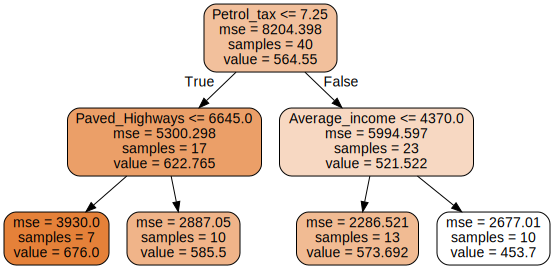

In [28]:
graphviz.Source(dot_data)

We observe that the tree results have four leaf nodes for the predictions.In decision tree, each region assigns a mean to the entire region.In regression problem, there is more variance in the dependent data which is not captured by Decision tree.Decision trees are basically used to understand the relation between variables.We can see that petrol tax has some interaction with paved highways and Average income.

Hyperparameter Tuning

In [30]:
param_grid = [{"max_depth":[3, 4, 5,6,7], "max_features":[2,3,4]}]

In [31]:
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123),\
                 param_grid = param_grid,\
                 cv=4)


Object created and now we can run on our model
fit the training data

In [32]:
gs.fit(X_train, Y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [3, 4, 5, 6, 7], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Check the value for best hyperparameters

In [33]:
gs.cv_results_['params']

[{'max_depth': 3, 'max_features': 2},
 {'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 4, 'max_features': 2},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 5, 'max_features': 2},
 {'max_depth': 5, 'max_features': 3},
 {'max_depth': 5, 'max_features': 4},
 {'max_depth': 6, 'max_features': 2},
 {'max_depth': 6, 'max_features': 3},
 {'max_depth': 6, 'max_features': 4},
 {'max_depth': 7, 'max_features': 2},
 {'max_depth': 7, 'max_features': 3},
 {'max_depth': 7, 'max_features': 4}]

In [34]:
gs.best_params_

{'max_depth': 3, 'max_features': 4}

In [35]:
print(gs.best_params_,gs.best_score_,gs.best_estimator_)

{'max_depth': 3, 'max_features': 4} 0.29393606582577414 DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=4,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best')


In [36]:
gs.cv_results_['rank_test_score']

array([13, 11,  1, 15,  7,  3,  4, 14,  2, 10,  5,  9, 12,  8,  6])

Now, we have have the best values available with us and we can apply prediction on our model to check whether the scores are improving.
Make predictions for the test set.

In [37]:
predictions = gs.predict(X_test)

In [38]:
mean_absolute_error(Y_test, predictions)

121.95833333333334

In [39]:
r2_score(Y_test, predictions)

0.15085104893818146

Since the best score is 29 percent, we can comprehend that the dataset has low number of values available.
Decision trees are not a good fit for regression.

Inferences:

we see that the hyperparameter value is best with depth 3 and max features as 4.

QUESTION 2: Decision Trees for Classification

Use this dataset to predict whether a bank note is authentic or fake depending upon the four different attributes of the image of the note. The attributes are Variance of wavelet transformed image, curtosis of the image, entropy, and skewness of the image.

Use Decision Trees to build a classifier for the give data. Use Grid Search to find the optimal value for the hyperparameters, and evaluate your model on suitable metrics.



In [77]:
Bill_auth = pd.read_csv("bill_authentication.csv")

In [78]:
Bill_auth.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Checking the data description

In [79]:
Bill_auth.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Checking for NULL and missing values

In [80]:
print(Bill_auth.isna().sum(),Bill_auth.isnull().sum())

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64 Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64


Creating training and Test Data Set

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(Bill_auth.drop("Class", axis=1), Bill_auth['Class'], test_size = 0.15,
                                                    random_state=123)

Decision Tree Creation

In [84]:
c_tree = DecisionTreeClassifier(max_depth=3)

In [85]:
c_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Making the predictions on test Data set

In [86]:
predictions = c_tree.predict(X_test)

Check the top 10 predictions and actual values.

In [87]:
predictions[:10]

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [88]:
list(Y_train[:10])

[0, 0, 1, 1, 0, 0, 0, 1, 0, 1]

The predictions does not seem to be accurate, let us go ahead with the accuracy parameters, we will use Gridsearch for best hyperparameters.

In [89]:
accuracy_score(Y_test, predictions)

0.9514563106796117

In [90]:
print(accuracy_score(Y_test, predictions, normalize=False), len(Y_test))

196 206


we see that only 10 cases were misclassified, now we will look at confusion matrix

In [91]:
confusion_mat = confusion_matrix(Y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=["Actual","Fake"],\
                            columns=["Actual","Fake"])

In [92]:
confusion_df

,Actual,Fake
Actual,111,3
Fake,7,85


We see that from the confusion matrix, we have 3 fake points and 7 actual points.

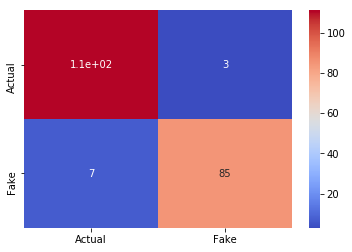

In [93]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

Visualize the tree and interpret the results

In [94]:
c_tree_im = export_graphviz(c_tree, filled=True, rounded=True, feature_names=X_train.columns, out_file=None)

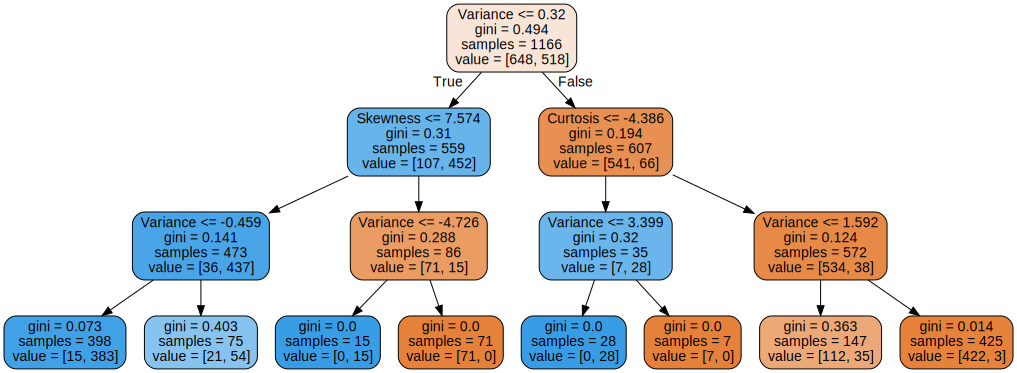

In [95]:
graphviz.Source(c_tree_im)

The above tree shows the interaction between variance, skewness and curtosis variables.

Grid Search

In [96]:
param_grid = [{"max_depth":[3, 4, 5,6,7], "max_features":[2,3,4]}]

In [97]:
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123),\
                 param_grid = param_grid,\
                 cv=4)

In [98]:
gs.fit(X_train, Y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [3, 4, 5, 6, 7], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Check the value for best hyperparameters

In [99]:
gs.cv_results_['params']

[{'max_depth': 3, 'max_features': 2},
 {'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 4, 'max_features': 2},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 5, 'max_features': 2},
 {'max_depth': 5, 'max_features': 3},
 {'max_depth': 5, 'max_features': 4},
 {'max_depth': 6, 'max_features': 2},
 {'max_depth': 6, 'max_features': 3},
 {'max_depth': 6, 'max_features': 4},
 {'max_depth': 7, 'max_features': 2},
 {'max_depth': 7, 'max_features': 3},
 {'max_depth': 7, 'max_features': 4}]

In [100]:
gs.best_params_

{'max_depth': 7, 'max_features': 2}

In [101]:
print(gs.best_params_,gs.best_score_,gs.best_estimator_)

{'max_depth': 7, 'max_features': 2} 0.9243380856456008 DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=2,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best')


In [102]:
predictions = gs.predict(X_test)

In [103]:
confusion_mat = confusion_matrix(Y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=["Actual","Fake"],\
                            columns=["Actual","Fake"])

In [104]:
confusion_df

,Actual,Fake
Actual,113,1
Fake,2,90


We see that from the confusion matrix, we have 1 fake points and 2 actual points.

In [105]:
predictions[:10]

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 0.])

In [106]:
list(Y_train[:10])

[0, 0, 1, 1, 0, 0, 0, 1, 0, 1]

In [107]:
accuracy_score(Y_test, predictions)

0.9854368932038835

In [108]:
print(accuracy_score(Y_test, predictions, normalize=False), len(Y_test))

203 206


we see that only 3 cases are misclassified.